<a href="https://colab.research.google.com/github/karthikdoguparthi/ElevateLabs/blob/main/Task%205%20Exploratory%20Data%20Analysis/EL_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 5 : Exploratory Data Analysis

Objective: Extract insights using visual and statistical exploration.

Tools: Python (Pandas, Matplotlib, Seaborn)

#Dataset

Titanic Kaggle Dataset: https://www.kaggle.com/c/titanic/overview

In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read datasets
df1 = pd.read_csv("/content/test.csv")
df2 = pd.read_csv("/content/gender_submission.csv")

# Merge on the common column
merged_df = pd.merge(df1, df2, on="PassengerId", how="inner")

#Dataset Information

In [3]:
#viewing data from dataset
merged_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [4]:
#test dataset shape
df1.shape

(418, 11)

In [5]:
# gender datadet shape
df2.shape

(418, 2)

In [6]:
#dataset information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
# dataset description
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000


In [8]:
#Viewing null values
merged_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


# Data Wrangling

In [9]:
#replace Nan vales from Age column to mode of the column
merged_df['Age'] = merged_df['Age'].fillna(merged_df['Age'].median()).astype(int)

#round fare coumn to 2 floating points
merged_df['Fare'] = merged_df['Fare'].round(2)

#Replace NaN values from cabin column to Unknown
merged_df['Cabin'] = merged_df['Cabin'].fillna('Unknown')

#replace Nan vales from Fare column to mode of the column
merged_df['Fare'] = merged_df['Fare'].fillna(merged_df['Fare'].median())

#replace values in Embarked column
merged_df['Embarked'] = merged_df['Embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

#replace values <0 in fair column to 0
merged_df.loc[merged_df['Fare'] < 0, 'Fare'] = 0


In [10]:
merged_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.83,Unknown,Queenstown,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.00,Unknown,Southampton,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.69,Unknown,Queenstown,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.66,Unknown,Southampton,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.29,Unknown,Southampton,1


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 39.3+ KB


In [12]:
#checking if all null are handled
merged_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


#Visualizations

## Chart 1

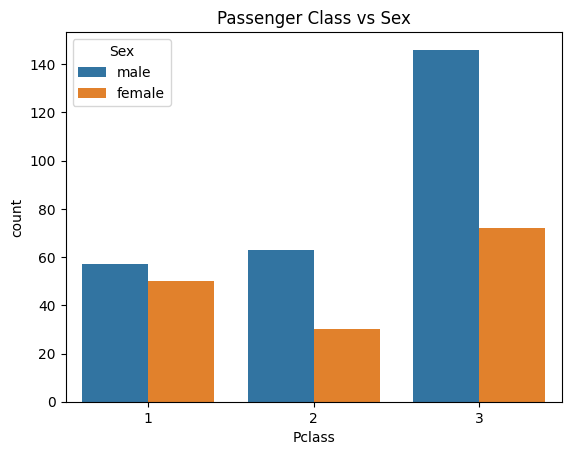

In [13]:
#Passenger class vs Sex chart
sns.countplot(x='Pclass', hue='Sex', data=merged_df)
plt.title('Passenger Class vs Sex')
plt.show()

Insights:

1. Most passengers prefered Class 3
2. Male and Female passengers choose Class 3


##Chart 2

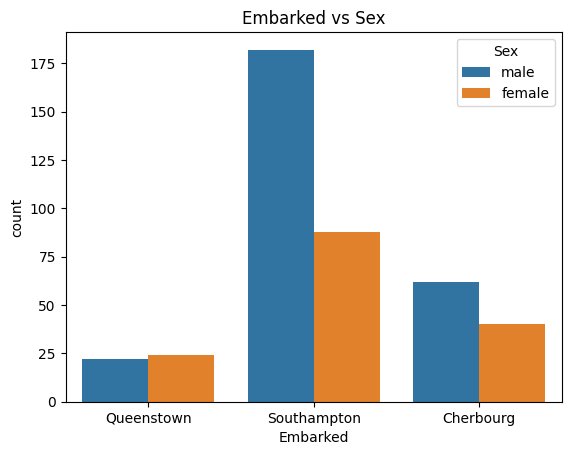

In [14]:
#Embarked vs Sex chart
sns.countplot(x='Embarked', hue='Sex', data=merged_df)
plt.title('Embarked vs Sex')
plt.show()

Insights:

1. Most people embarked from Southampton
2. Queenstown has least embarkments
3. Most males and females from Southampton, Least males and females form Queenstown.

##Chart 3

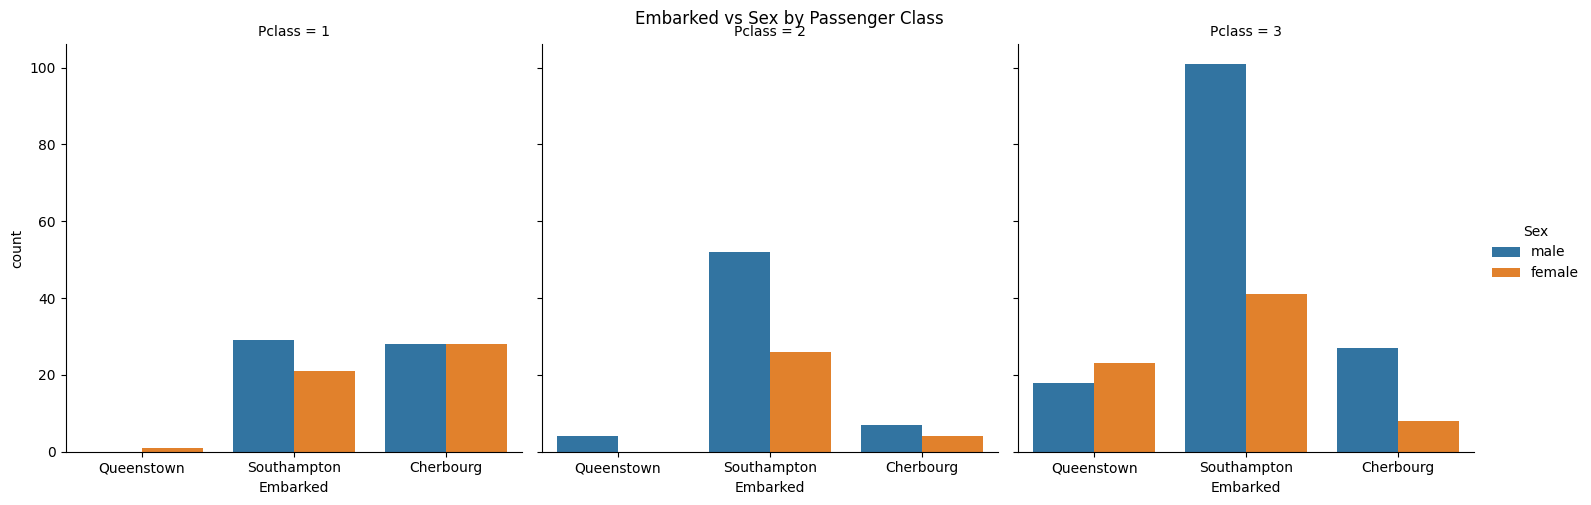

In [15]:
#Embarked vs Sex chart wrt Pclass
sns.catplot(x='Embarked', hue='Sex', col='Pclass', data=merged_df, kind='count')
plt.suptitle('Embarked vs Sex by Passenger Class', y=1)
plt.show()

Insight:

1. Most male and female prefer Class 3 and from Southampton
2. Least male prefer Class 1 from Queenstown.
3. Least females prefer Class 2 from Queenstown.

##Chart 4

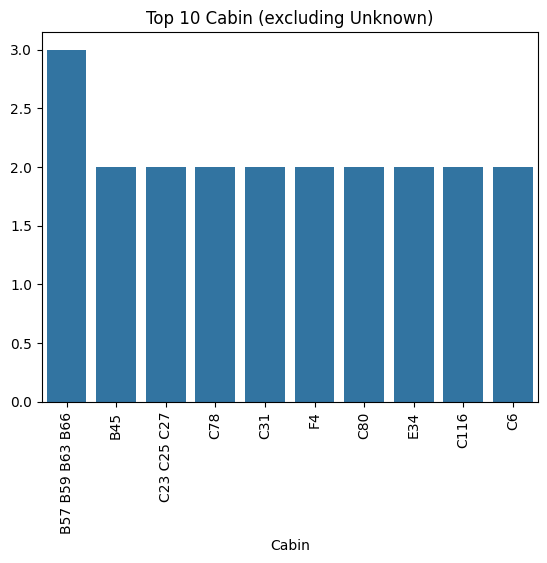

In [16]:
#top 10 Cabin excluding Unknown
top_11_cabin = merged_df['Cabin'].value_counts().head(11)
filtered_cabin = top_11_cabin.drop('Unknown')
sns.barplot(x=filtered_cabin.index, y=filtered_cabin.values)
plt.xticks(rotation=90)
plt.title('Top 10 Cabin (excluding Unknown)')
plt.show()

Insights:

1. Unknown values or blanks are very high. So excluded.
2. Most prefered cabin is B57 B59 B63 B66

##Chart 5

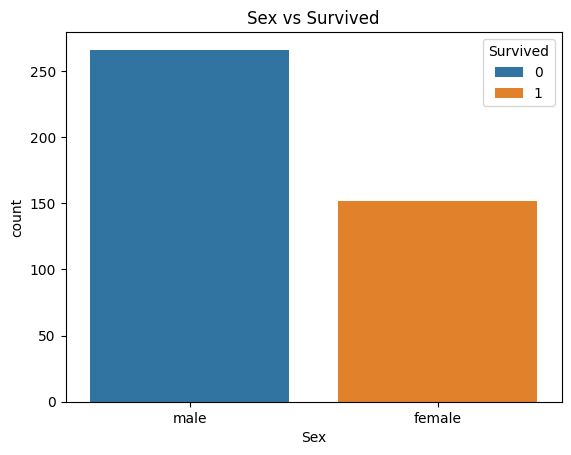

In [17]:
#Sex vs Survived chart
sns.countplot(x='Sex', hue='Survived', data=merged_df)
plt.title('Sex vs Survived')
plt.show()

Insights:

1. Most Survied are Males and count over 250
2. Least surived are Females and count over 150

##Chart 6

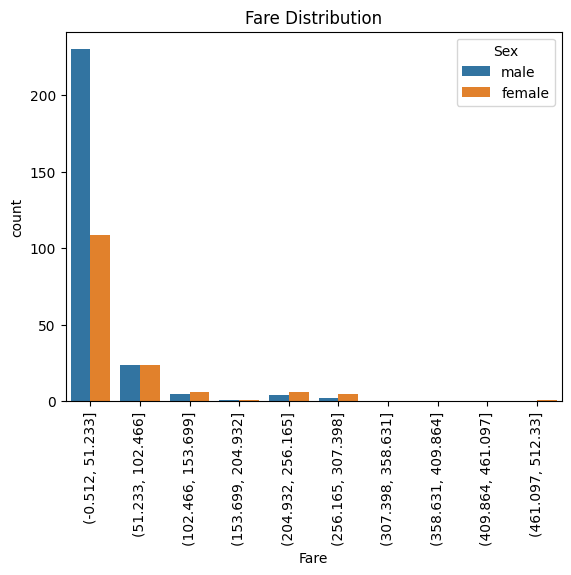

In [18]:
# segregate Fare column to intervals
fare_bins = pd.cut(merged_df['Fare'], bins=10) # You can adjust the number of bins
sns.countplot(x=fare_bins, hue= 'Sex', data=merged_df)
plt.title('Fare Distribution')
plt.xticks(rotation=90)
plt.show()

Insights:

1. Most sold price of the Titatic is in the range -0.512 to 51.233
2. Most tickets sold are from Male and over 240
3. Most tickets sold from Women under the same category is over 100.

##Chart 7

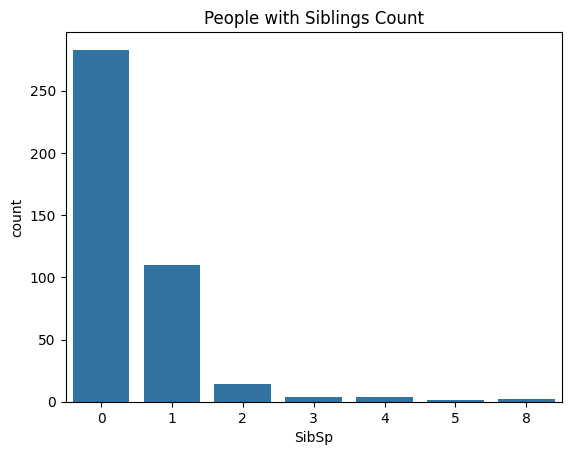

In [19]:
#Sibsp count total no of Siblings(brother, sister, stepbrother, stepsister) or Spouse(Husband, Wife)
sns.countplot(x='SibSp', data=merged_df)
plt.title('People with Siblings Count')
plt.show()

Insights:

1. Most people travelled Alone
2. Few people travelled with atleast one sibling or spouse.

##Chart 8

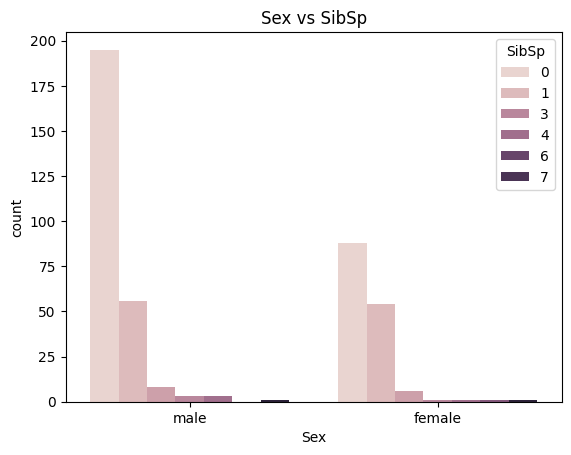

In [20]:
#Sex vs Sibsp clart
#People travelling with total no of Siblings(brother, sister, stepbrother, stepsister) or Spouse(Husband, Wife)
sns.countplot(x='Sex', hue='SibSp', data=merged_df)
plt.title('Sex vs SibSp')
plt.show()

Insights:

1. Most people travelling alone are Males.
2. Female count travelling alone is around 100

##Chart 9

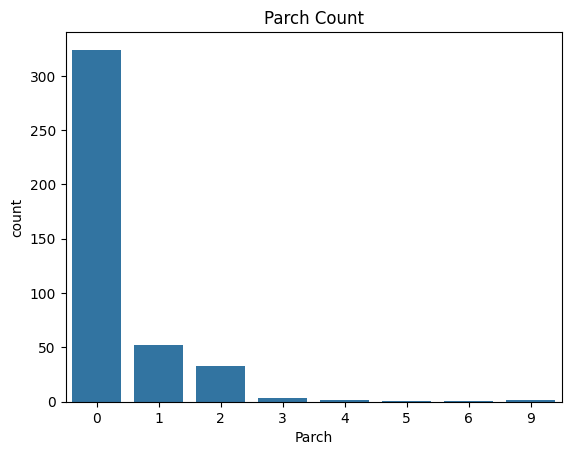

In [21]:
#Parch count total no of Parent(mother, father) or Child(daughter, son, stepdaughter, stepson)
sns.countplot(x='Parch', data=merged_df)
plt.title('Parch Count')
plt.show()

Insights:

1. Most people travelled alone.
2. Few people travelled with atleast with parent or child.

##Chart 10

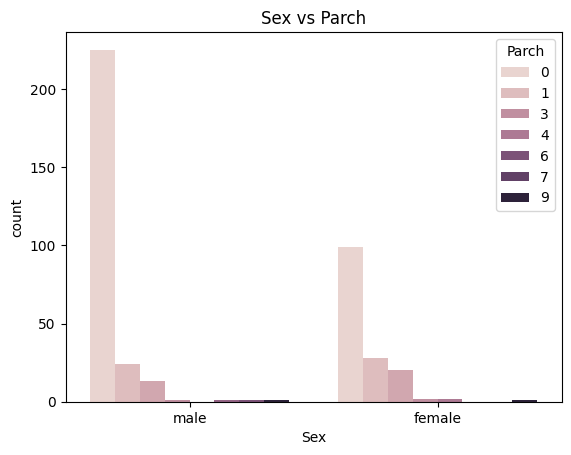

In [22]:
#Sex vs Parch clart
#People travelling with total no of Parent(mother, father) or Child(daughter, son, stepdaughter, stepson)
sns.countplot(x='Sex', hue='Parch', data=merged_df)
plt.title('Sex vs Parch')
plt.show()

Insights:

1. Most people who travelled alone are Males
2. Female count who travelled alone is around 100.
3. Female lean towards having someone with them.

##Chart 11

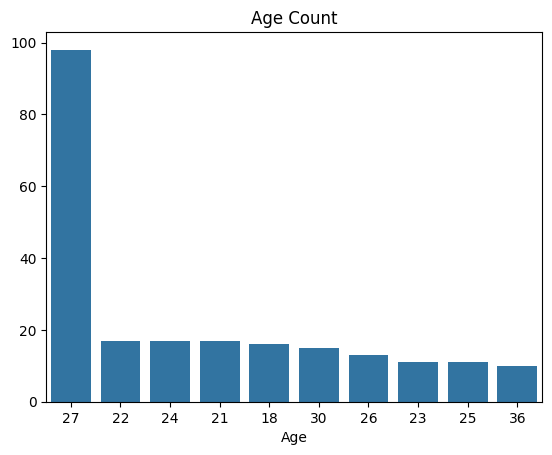

In [23]:
#Top 10 age distribution
top_10_age = merged_df['Age'].value_counts().head(10)
sns.barplot(x=top_10_age.index,y=top_10_age.values,order=top_10_age.index)
plt.title('Age Count')
plt.show()

Insights:

1. Most travelled age group is 27.
2. 22, 24, 21 years show similar travel results.

##Chart 12

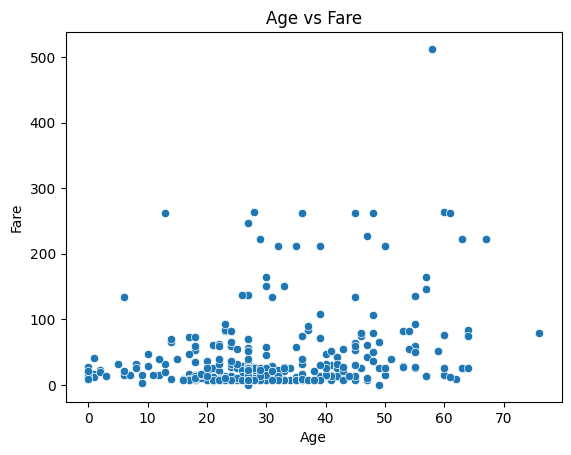

In [24]:
sns.scatterplot(x='Age', y='Fare', data=merged_df)
plt.title('Age vs Fare')
plt.show()

Insights:

1. Most data is scattered towards Age 20-40.
2. Most fare is scattered from 0 to 100.

##Chart 13

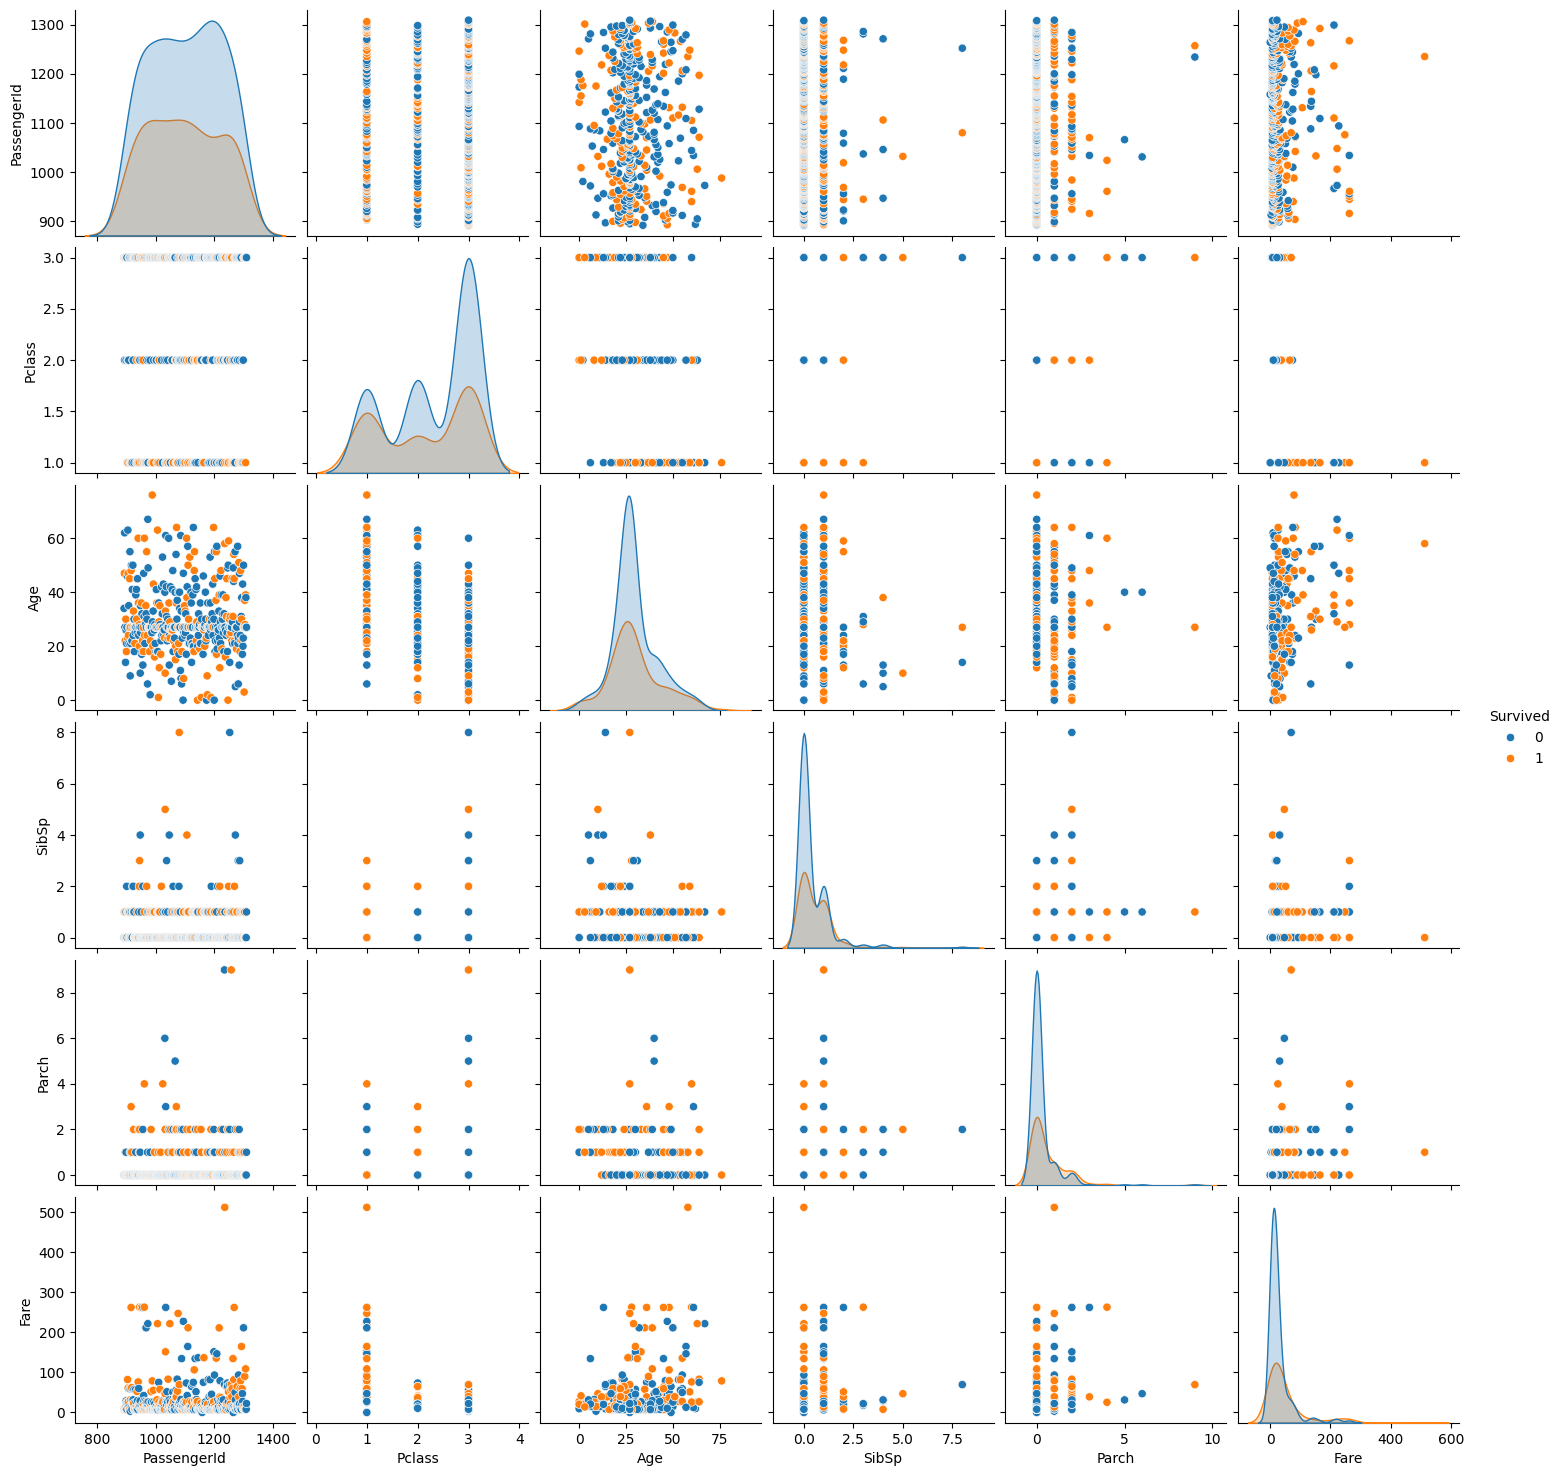

In [25]:
sns.pairplot(merged_df, hue='Survived')
plt.show()

Insights:

1. Passengers who paid higher fares generally had a higher chance of survival.
2. Survival rates are noticeably higher in 1st class compared to 3rd class.

# Conclusion

Passenger Class and Embarkation: Most passengers were in Class 3 and embarked from Southampton.

Missing Values: The 'Age', 'Fare', and 'Cabin' columns had missing values, which were handled by imputation (median for Age and Fare, 'Unknown' for Cabin).

Cabin Information: A large number of cabin values were missing, and among the recorded cabins, several had only a few passengers.

Travel Companions: A significant majority of passengers traveled alone, with fewer traveling with siblings/spouses or parents/children.

Age Distribution: The most frequent age among passengers was 27.

Fare Distribution: Most tickets were in the lower fare range.

Survival:
1. The pairplot suggests that passengers who paid higher fares and were in higher classes (Pclass 1) had a higher chance of survival.
2. The 'Sex vs Survived' chart indicates that a higher number of males did not survive compared to females.